In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/loan_prediction.csv")

In [3]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y
247,LP001819,Male,Yes,1,Not Graduate,No,6608,0.0,137.0,180.0,1.0,Urban,Y
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
204,LP001691,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
429,LP002370,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


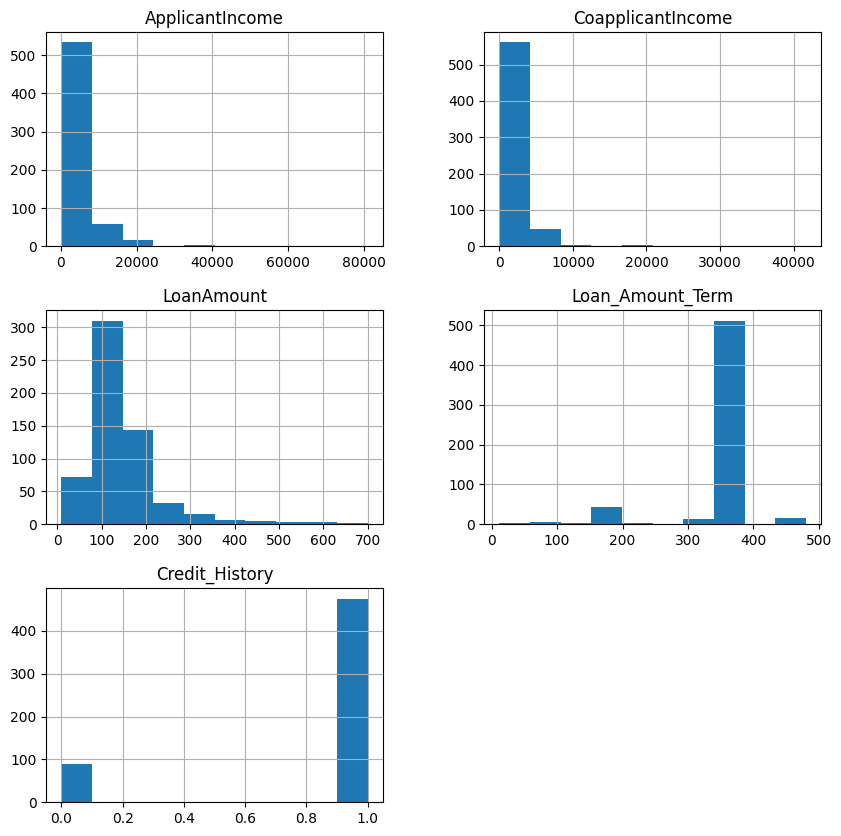

In [6]:
df.hist(figsize=(10,10))
plt.show()

In [7]:
df.skew(numeric_only=True)

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.677552
Loan_Amount_Term,-2.362414
Credit_History,-1.882361


In [8]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
### Replace the missing values with mean/median/Mode

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# prompt: Replace the missing values with mean/median/Mode

# Replace missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Replace missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
# prompt: Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.sample(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
561,561,0,1,1,0,1,19484,0.0,600.0,360.0,1.0,1,1
400,400,1,1,2,1,0,2889,0.0,45.0,180.0,0.0,2,0
394,394,1,1,2,0,0,3100,1400.0,113.0,360.0,1.0,2,1
547,547,1,0,0,0,0,2526,1783.0,145.0,360.0,1.0,0,1
505,505,1,1,2,0,0,3510,4416.0,243.0,360.0,1.0,0,1
101,101,1,0,0,0,0,4843,3806.0,151.0,360.0,1.0,1,1
459,459,1,1,0,0,0,8334,0.0,160.0,360.0,1.0,1,0
137,137,1,1,2,0,1,3316,3500.0,88.0,360.0,1.0,2,1
170,170,1,1,0,1,0,1820,1769.0,95.0,360.0,1.0,0,1
390,390,1,0,3,0,0,9167,0.0,185.0,360.0,1.0,0,1


In [14]:
df.dtypes

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [16]:
Y=df[["Loan_Status"]]
X=df.drop(["Loan_ID","Loan_Status"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()

In [23]:
model.fit(X_train,Y_train)

LogisticRegression()

In [24]:
model.score(X_train,Y_train)

0.8205128205128205

In [25]:
model.score(X_test,Y_test)

0.7891891891891892

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier()
model_1.fit(X_train,Y_train)


RandomForestClassifier()

In [28]:
model_1.score(X_train,Y_train)

1.0

In [29]:
model_1.score(X_test,Y_test)

0.7621621621621621